In [1]:
import pandas as pd

# Step 1: Load the dataset
file_path = 'creditcard.csv'
df = pd.read_csv(file_path)

# Step 2: Show basic info about the dataset
print(df.info())
print(df.head())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71396 entries, 0 to 71395
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    71396 non-null  int64  
 1   V1      71396 non-null  float64
 2   V2      71396 non-null  float64
 3   V3      71396 non-null  float64
 4   V4      71396 non-null  float64
 5   V5      71396 non-null  float64
 6   V6      71396 non-null  float64
 7   V7      71396 non-null  float64
 8   V8      71396 non-null  float64
 9   V9      71396 non-null  float64
 10  V10     71396 non-null  float64
 11  V11     71396 non-null  float64
 12  V12     71396 non-null  float64
 13  V13     71396 non-null  float64
 14  V14     71396 non-null  float64
 15  V15     71396 non-null  float64
 16  V16     71396 non-null  float64
 17  V17     71396 non-null  float64
 18  V18     71396 non-null  float64
 19  V19     71396 non-null  float64
 20  V20     71396 non-null  float64
 21  V21     71396 non-null  float64
 22

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64
Class distribution:
 Class
0.0    71218
1.0      177
Name: count, dtype: int64


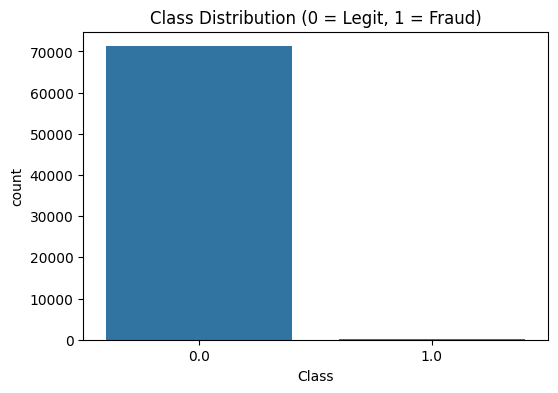

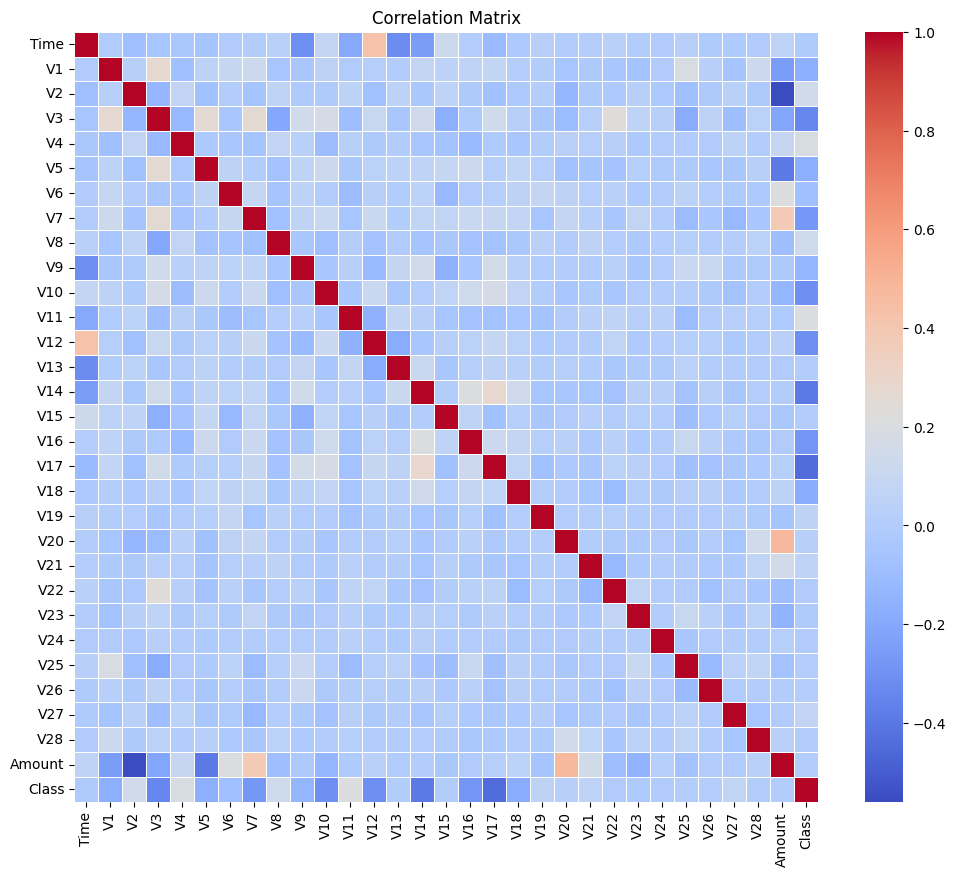

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check class distribution
print("Class distribution:\n", df['Class'].value_counts())

# Plot class distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution (0 = Legit, 1 = Fraud)')
plt.show()

# Plot correlations (optional heavy computation)
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Step 1: Drop any rows with NaN values (just in case)
df_cleaned = df.dropna()

# Step 2: Separate features and target
X = df_cleaned.drop('Class', axis=1)
y = df_cleaned['Class']

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: SMOTE to balance the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Step 5: Confirm new balance
print("After SMOTE, class distribution:\n", pd.Series(y_train_resampled).value_counts())


After SMOTE, class distribution:
 Class
0.0    56973
1.0    56973
Name: count, dtype: int64


In [4]:
import numpy as np
import random

# Simplified states: 0 = legit, 1 = fraud
states = [0, 1]
actions = [0, 1]  # 0 = predict legit, 1 = predict fraud

q_table = np.zeros((len(states), len(actions)))

# Hyperparameters
alpha = 0.1      # learning rate
gamma = 0.9      # discount factor
epsilon = 0.1    # exploration rate
episodes = 10000

# Reward function
def get_reward(state, action):
    if state == 1 and action == 1: return 10   # Correctly detect fraud
    if state == 0 and action == 0: return 5    # Correctly allow legit
    return -10                                 # Wrong decision

# Training loop
for _ in range(episodes):
    state = random.choice(states)
    action = random.choice(actions) if random.random() < epsilon else np.argmax(q_table[state])

    reward = get_reward(state, action)
    next_state = random.choice(states)

    q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])

print("📘 Final Q-Table:")
print(q_table)


📘 Final Q-Table:
[[72.04106844 57.84802966]
 [57.24042182 77.67962259]]
